### Master of Applied Artificial Intelligence

**Course: TC4033 - Computational Vision for Images and Video**

<img src="./../assets/logo.png" alt="Image Alt Text" width="500"/>

**Region growing**

Tutor: Dr. Gilberto Ochoa


Team members:
* Alfonso de Lucas Espinosa - A01795118
* Ignacio Jose Aguilar Garcia - A00819762
* Alejandro Calderon Aguilar - A01795353
* Ricardo Mar Cupido - A01795394
* Mario Fonseca Martinez - A01795228

### Importing Libraries <a class="anchor" id="libraries" ></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
from scipy import signal as sig
import numpy as np
from PIL import Image

In [3]:
def plot_images(images=[], labels=[], nrows=1, ncols=2, figsize=(12,8), cmap="gray", hideAxis=True):
    """
    Plots a list of images in a grid layout using Matplotlib.

    Parameters:
    images (list): List of images to be plotted.
    labels (list): List of labels for each image. Default is an empty list.
    nrows (int): Number of rows in the grid. Default is 1.
    ncols (int): Number of columns in the grid. Default is 2.
    figsize (tuple): Size of the figure in inches. Default is (12, 8).
    cmap (str): Colormap to be used for displaying the images. Default is "gray".

    Returns:
    None
    """

    # set the subplots
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    # Iterate over each axis defined in M*N as flat
    for i, ax in enumerate(axs.flat):
        # validates that the dimensions of axs fits with images array parameter
        if i < len(images):
            # plot the image
            ax.imshow(images[i], cmap=cmap)
            # if there are labels defined then set a title
            if len(labels) > 0:
                ax.set_title(labels[i])
            # dont show the axis ticks
            if hideAxis:
                ax.axis("off")
        else:
            # dont show an empty plot
            ax.axis("off")
    # fits the plots
    plt.tight_layout()
    plt.show()

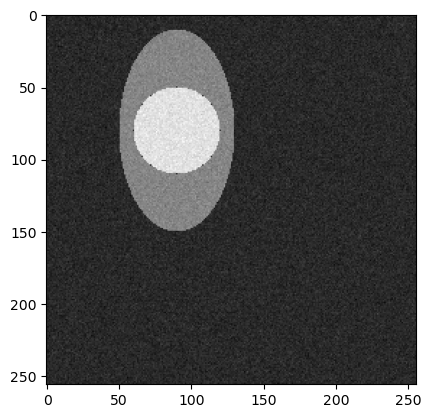

In [4]:
xx, yy = np.meshgrid(np.arange(256), np.arange(256))
img = np.zeros((256, 256))

rr0 = (xx-90)**2 + (yy-80)**2
img[rr0 < 30**2] = 20.0

# contiguous region
rr1 = (xx-90)**2/40**2 + (yy-80)**2/70**2
img[(rr0 > 30.0**2)*(rr1 < 1.0)] = 10.0

noise = np.random.normal(0,1, img.shape)

img = img + noise

plt.imshow(img, cmap="gray")

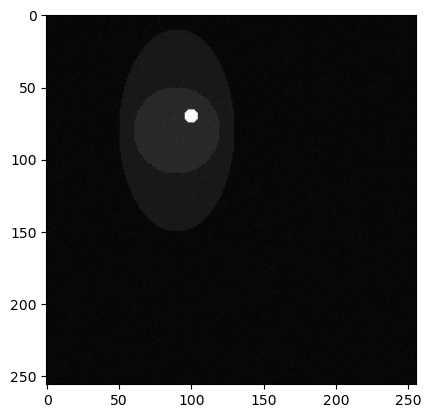

In [5]:
# using a sedd

seed = (100, 70)

x0,  y0 = seed

# draw a circle around the seed
flag = np.zeros(img.shape)
flag[((xx-x0)**2 + (yy-y0)**2) < 5**2] = 125

plt.imshow(img + flag, cmap="gray")



In [8]:
# start a flood filling like process

def distance(x0, y0, x1, y1, image):
    v0 = image[y0, x0]
    v1 = image[y1, x1]
    return abs(v1 - v0)

def N4(x0, y0, M, N):
    # Use a base structure
    heigth = []
    
    if x0 + 1 < M:
        heigth.append((x0 + 1, y0))
    if 0 < x0 - 1:
        heigth.append((x0 - 1, y0))
    if y0 + 1 < N:
        heigth.append((x0, y0 + 1))
    if 0 < y0 - 1:
        heigth.append((x0, y0 - 1))
        
    return heigth


def grow(seed_xy, image, threshold, dist, max_it = 1e6):
    x0, y0 = seed_xy
    mask = np.zeros(image.shape)
    visited_pixels = np.zeros(image.shape)
    N, M = image.shape
    seed = []
    seed.append((x0, y0))
    it = 0
    while len(seed) > 0:
        x0, y0 = seed.pop()
        for x1, y1 in N4(x0, y0, M, N):
            if distance(x0, y0, x1, y1, image) <= threshold and mask[y1,x1] == 0 and visited_pixels[y1, x1] == 0:
                seed.append((x1, y1))
        mask[y0, x0] = 1
        visited_pixels[y0, x0] = 1
        it = it + 1
        if it > max_it:
            print("overgrowing")
            break
    return mask



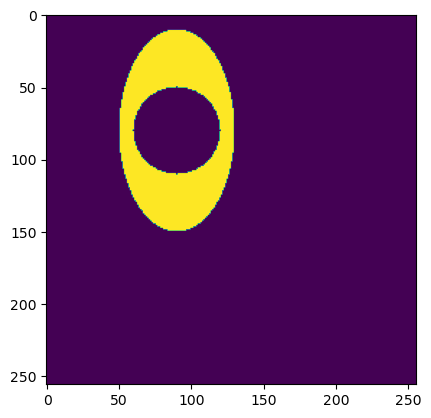

In [10]:
mask = grow((100, 25), img, 4, distance)

plt.imshow(mask)

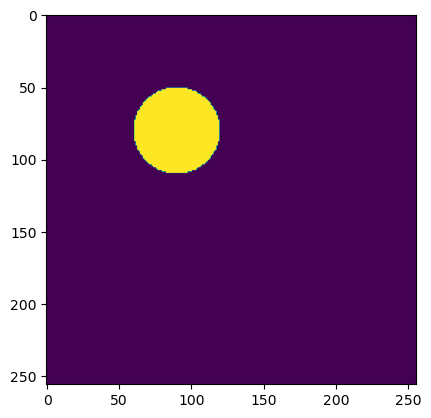

In [11]:
mask = grow((100, 70), img, 4, distance)

plt.imshow(mask)

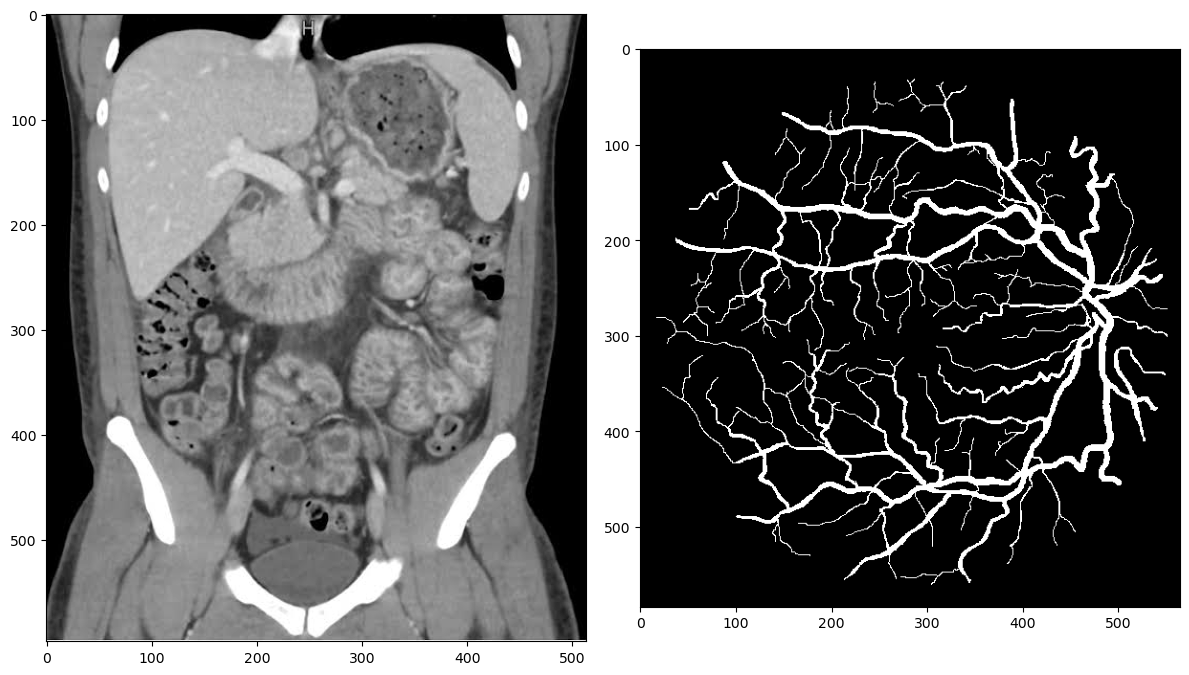

In [23]:
corp_image = cv2.imread("data/corps.JPG")
gray_corps_image = cv2.cvtColor(corp_image, cv2.COLOR_BGR2GRAY)


# Load GIF using PIL
retina_gif = Image.open("data/22_manual1.gif")
# Convert to grayscale (binary)
retina_image = np.array(retina_gif.convert("L"))  # Convert to grayscale
# Ensure it's binary (0 or 255)
_, binary_retina_image = cv2.threshold(retina_image, 128, 255, cv2.THRESH_BINARY)

plot_images([gray_corps_image, binary_retina_image], hideAxis=False)

# plt.imshow(corp_image, cmap="gray")

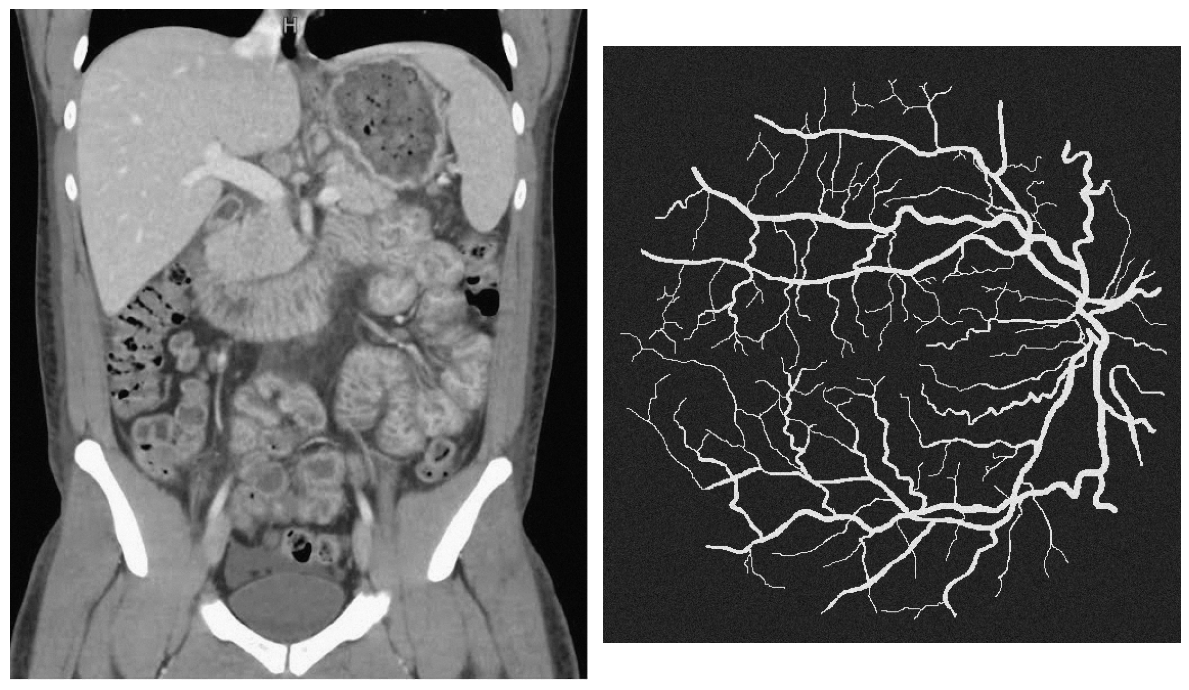

In [24]:
corps_noise = np.random.normal(0, 2, gray_corps_image.shape)
retina_noise = np.random.normal(0, 10, binary_retina_image.shape)

gray_corps_image = gray_corps_image + corps_noise
binary_retina_image = binary_retina_image + retina_noise

plot_images([gray_corps_image, binary_retina_image])

In [25]:
def set_seed(image, seed, seed_size=2):
    xx, yy = np.meshgrid(np.arange(image.shape[1]), np.arange(image.shape[0]))
    x0, y0 = seed

    # draw a circle around the seed
    flag = np.zeros(image.shape)
    flag[((xx - x0)**2 + (yy - y0)**2) < seed_size**2] = 125
    
    return image + flag

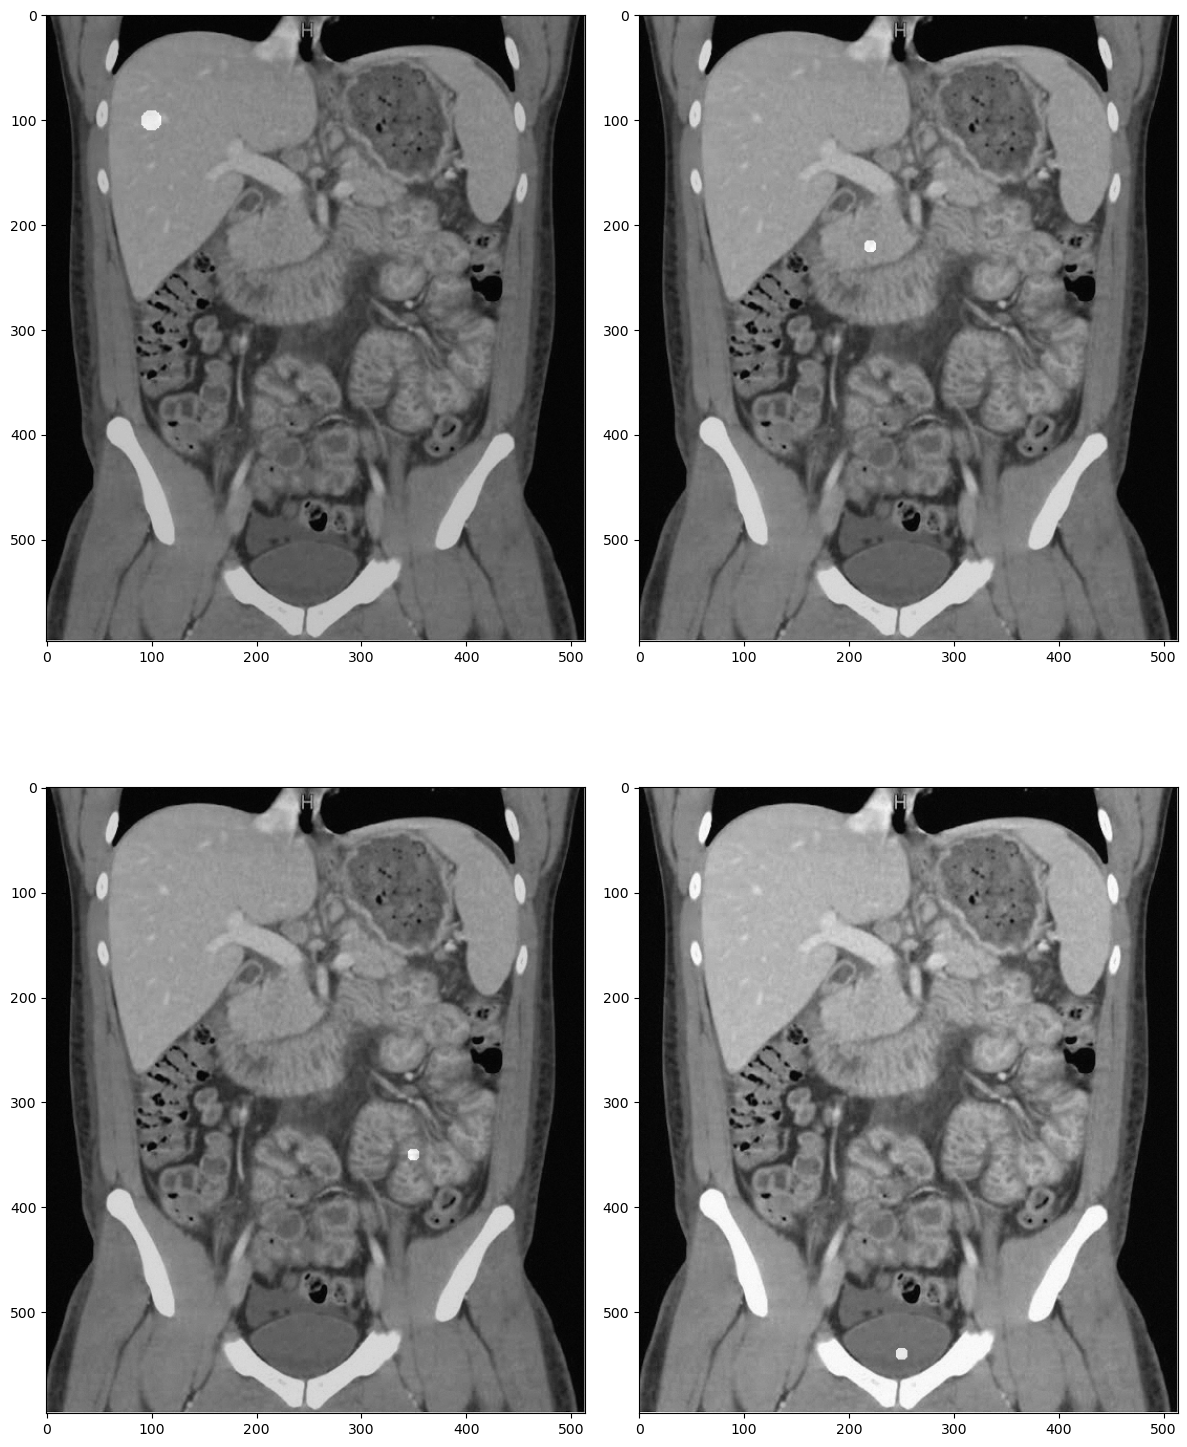

In [95]:
corps_seed = (100, 100)
corps_seed2 = (220,220)
corps_seed3 = (350, 350)
corps_seed4 = (250,540)
# retina_seed = (445, 350)

seed_img1 = set_seed(gray_corps_image, corps_seed, 10)
seed_img2 = set_seed(gray_corps_image, corps_seed2, 6)
seed_img3 = set_seed(gray_corps_image, corps_seed3, 6)
seed_img4 = set_seed(gray_corps_image, corps_seed4, 6)
# seed_img2 = set_seed(binary_retina_image, retina_seed, 2)

plot_images([seed_img1, seed_img2, seed_img3, seed_img4], hideAxis=False, figsize=(12,16), ncols=2, nrows=2)

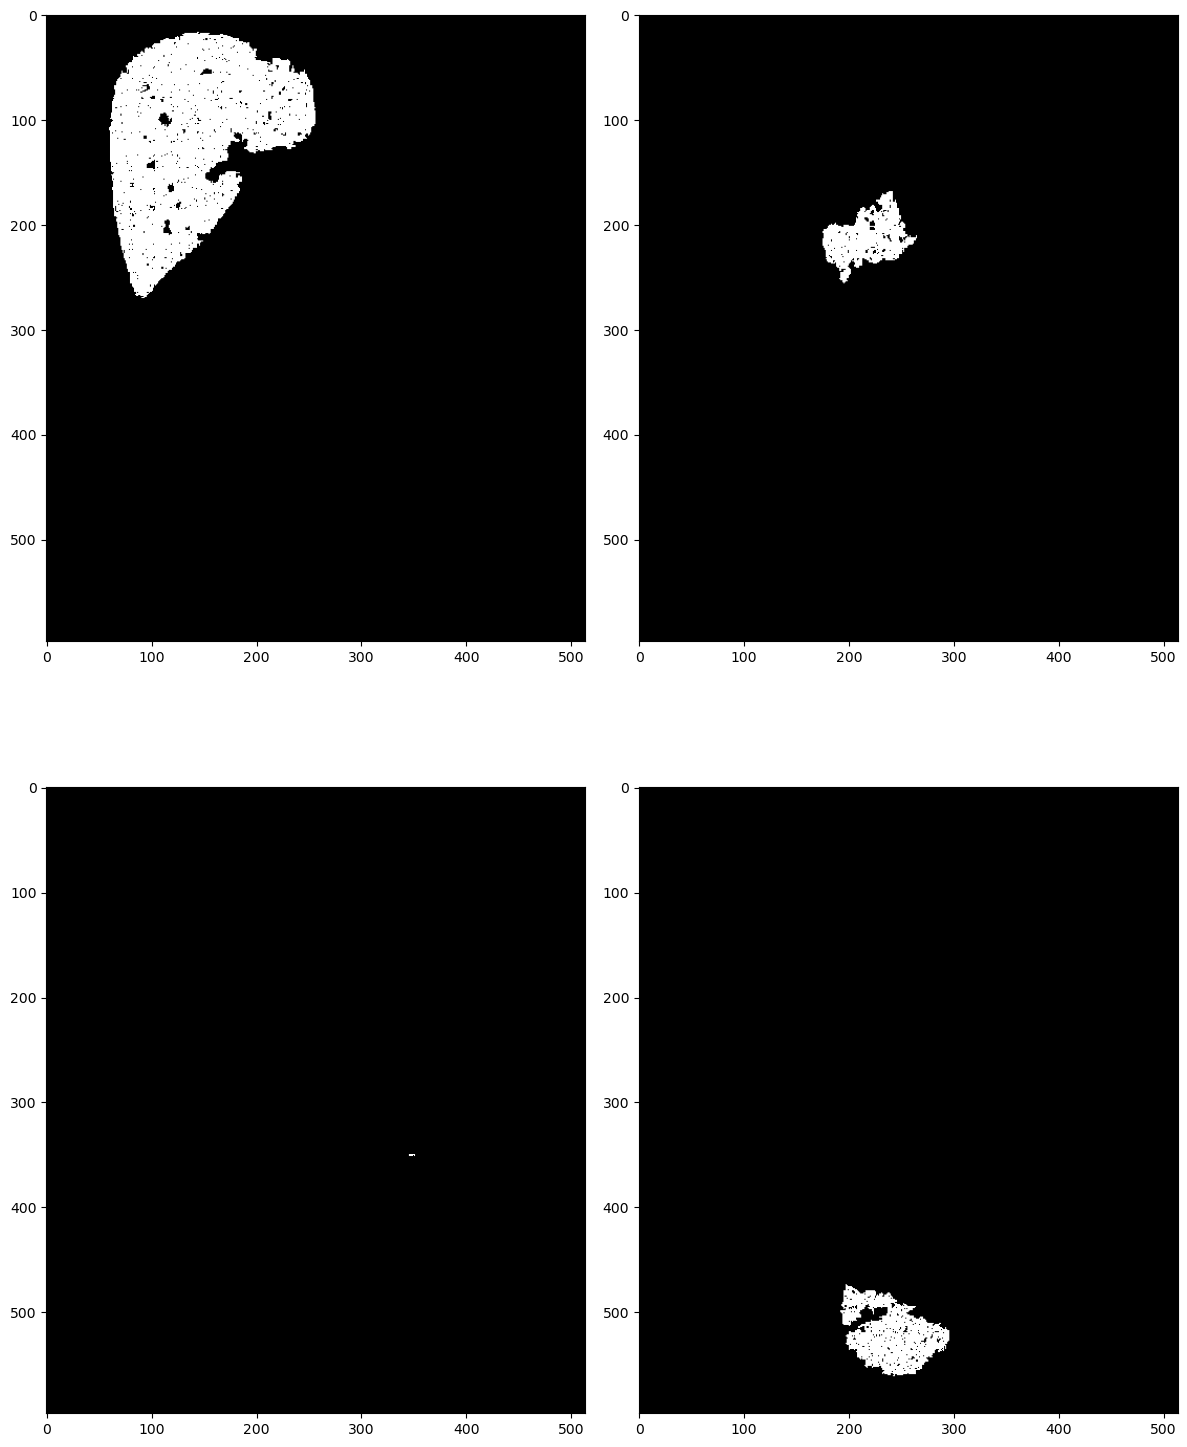

In [100]:
corps_mask = grow(corps_seed, gray_corps_image, 4, distance)
corps_organ_mask2 = grow(corps_seed2, gray_corps_image, 4, distance)
corps_organ_mask3 = grow(corps_seed3, gray_corps_image, 4, distance)
corps_organ_mask4 = grow(corps_seed4, gray_corps_image, 3, distance)

plot_images([corps_mask, corps_organ_mask2, corps_organ_mask3, corps_organ_mask4], hideAxis=False, figsize=(12,16), ncols=2, nrows=2)

In [101]:
def plot_region_growing(image, mask, color=(0,255, 0)):

    if mask.dtype != np.uint8:
        mask = cv2.convertScaleAbs(mask)

    # create a blank color image with the same shape as the original image
    color_mask = np.zeros_like(image, dtype=np.uint8)
    # fill with the chosen color
    color_mask[:] = color

    # apply the mask to create a colored region
    colored_region = cv2.bitwise_and(color_mask, color_mask, mask=mask)

    # invert the mask to keep only the unmasked region of the original image
    mask_inv = cv2.bitwise_not(mask)
    
    if mask_inv.dtype != np.uint8:
        mask_inv = cv2.convertScaleAbs(mask_inv)

    # keeping only the original image where the mask is NOT applied
    background = cv2.bitwise_and(image, image, mask=mask_inv)

    # merging the original image with the colored mask region
    final_image = cv2.add(background, colored_region)
    
    return final_image

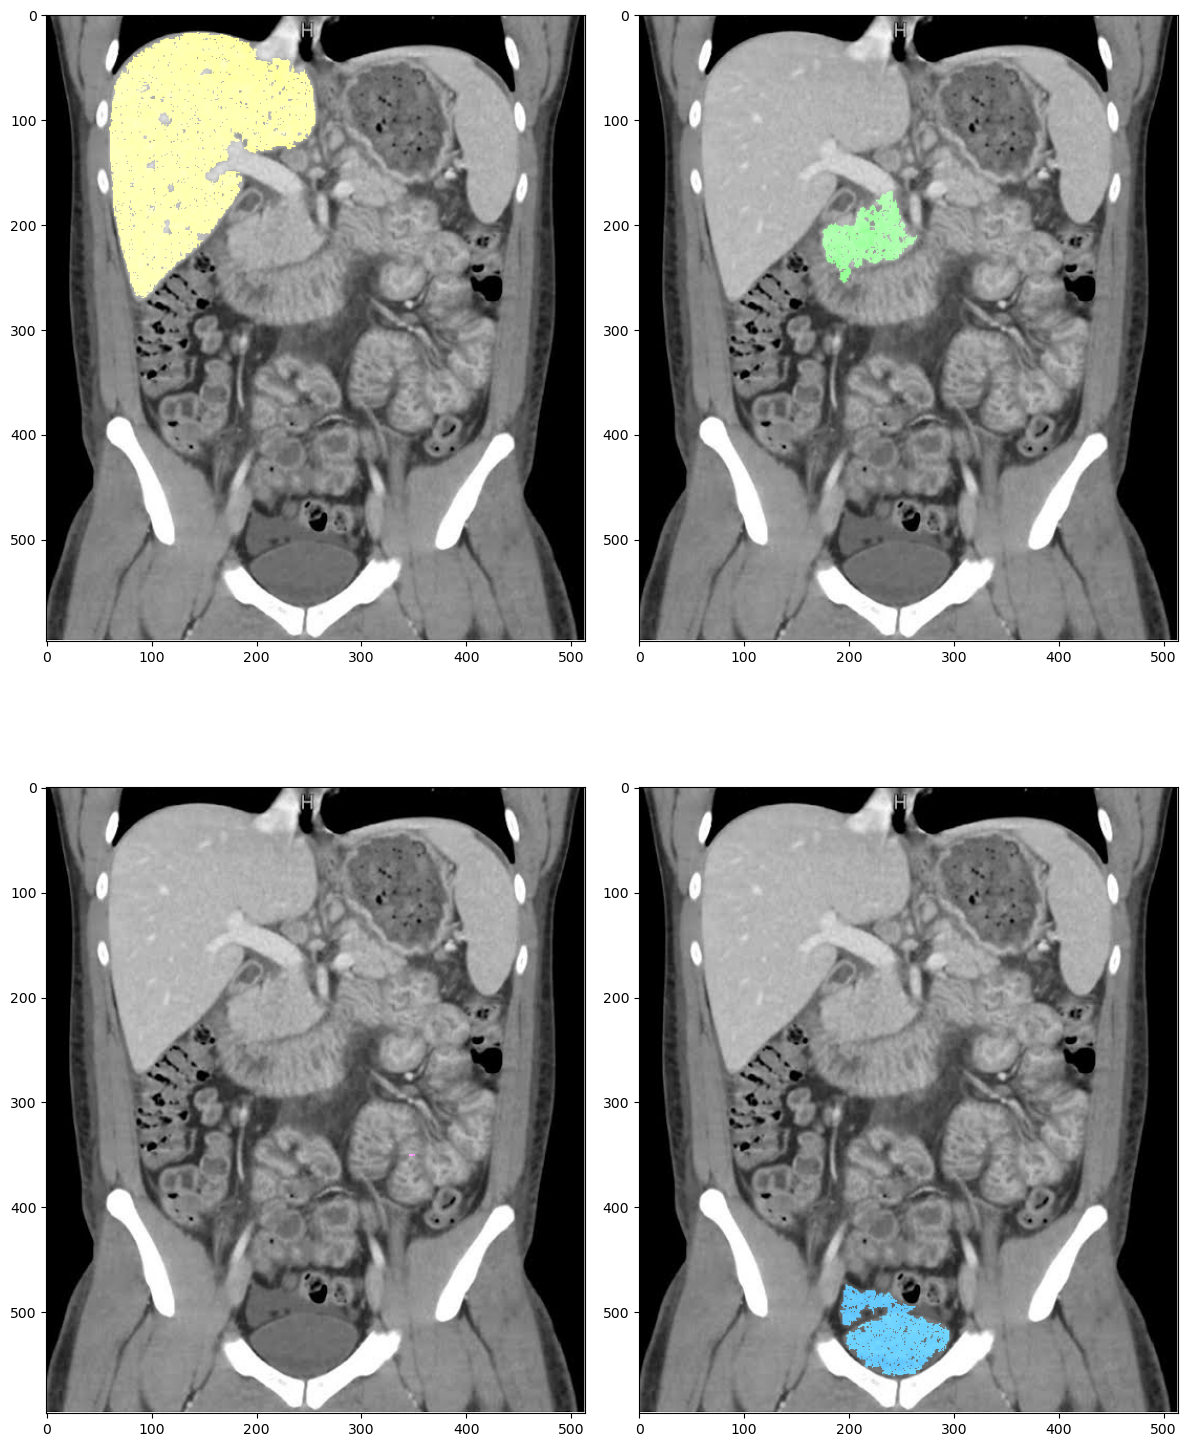

In [105]:
corps_region = plot_region_growing(corp_image, corps_mask, color=(255, 100, 0))
corps_organ_region2 = plot_region_growing(corp_image, corps_organ_mask2, color=(0, 255, 0))
corps_organ_region3 = plot_region_growing(corp_image, corps_organ_mask3, color=(255, 0, 255))
corps_organ_region4 = plot_region_growing(corp_image, corps_organ_mask4, color=(0, 100, 255))

# retina_img = (retina_image * 255).astype(np.uint8)
# # Convert to 3-channel (grayscale RGB)
# retina_img = cv2.cvtColor(retina_img, cv2.COLOR_GRAY2BGR)
# # print(retina_img.shape)
# retina_region = plot_region_growing(retina_img, retina_mask, color=(0,255,0))

plot_images([corps_region,corps_organ_region2, corps_organ_region3, corps_organ_region4], hideAxis=False, figsize=(12,16), ncols=2, nrows=2)


### References

1. paper
2. DRIVE - Grand Challenge. (n.d.). grand-challenge.org. https://drive.grand-challenge.org/